## DEMO: Visualizing waves  

In [6]:
import numpy as np  
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ipywidgets import interact, interactive
import scipy  
from scipy.constants import physical_constants, hbar, h, c, k, m_e, Rydberg, e, N_A

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Standing and traveling waves in 1D

We begin by plotting a simple periodic function using numpy (np) and matplotlib.pyplot (plt) 

$$y = \sin(kx)=\sin\left(\frac{2\pi}{\lambda} x\right)$$

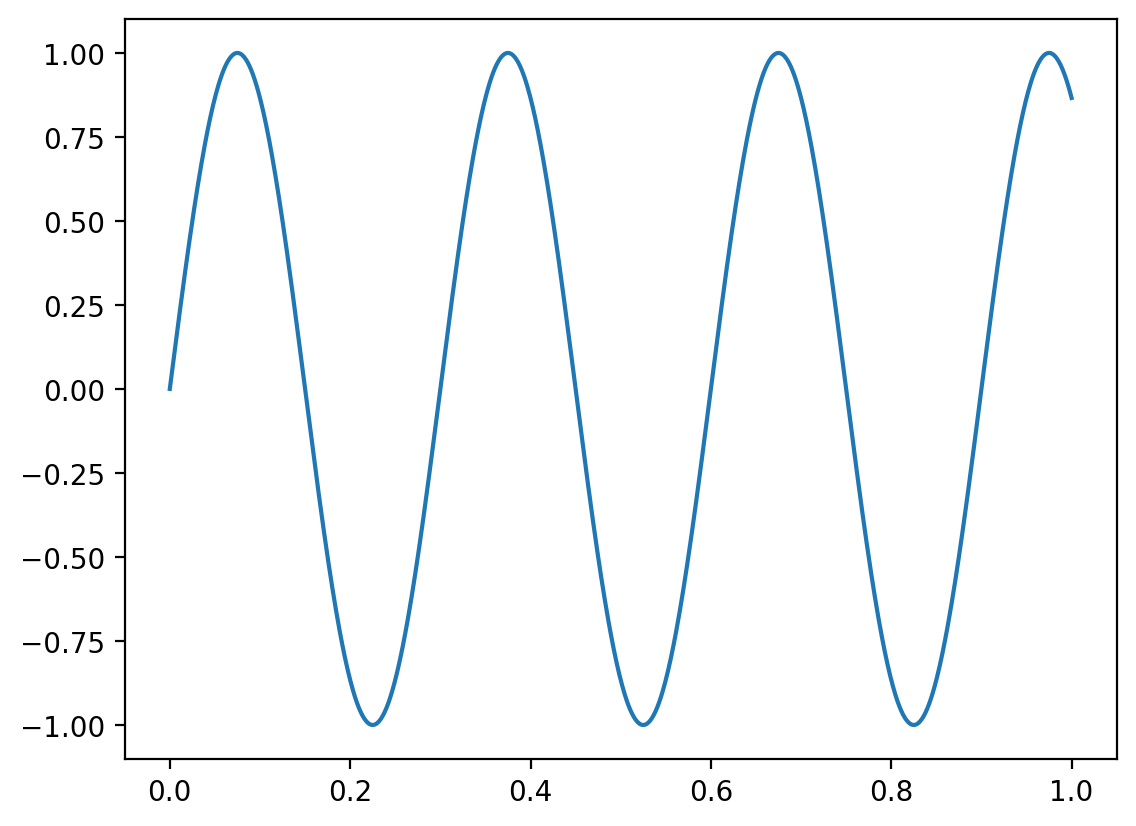

In [2]:
L=0.3            # Try different wavelengths

x = np.linspace(0.0, 1.0, 1000)

y = np.sin(2 * np.pi * x/L)

plt.plot(x, y)

**By putting above example inside a python function will make wavelength exploration convenient**

In [32]:
def wave1d(L=2):
    
    x = np.linspace(0.0, 1.0, 1000)
    
    y = np.sin(2*np.pi * x / L )

    plt.plot(x, y, label=f'L={L}')
    
    plt.xlabel('x')
    plt.xlabel('y')
    plt.legend()
    plt.title('Sine waves')
    plt.ylim(-1,1)
    plt.show()

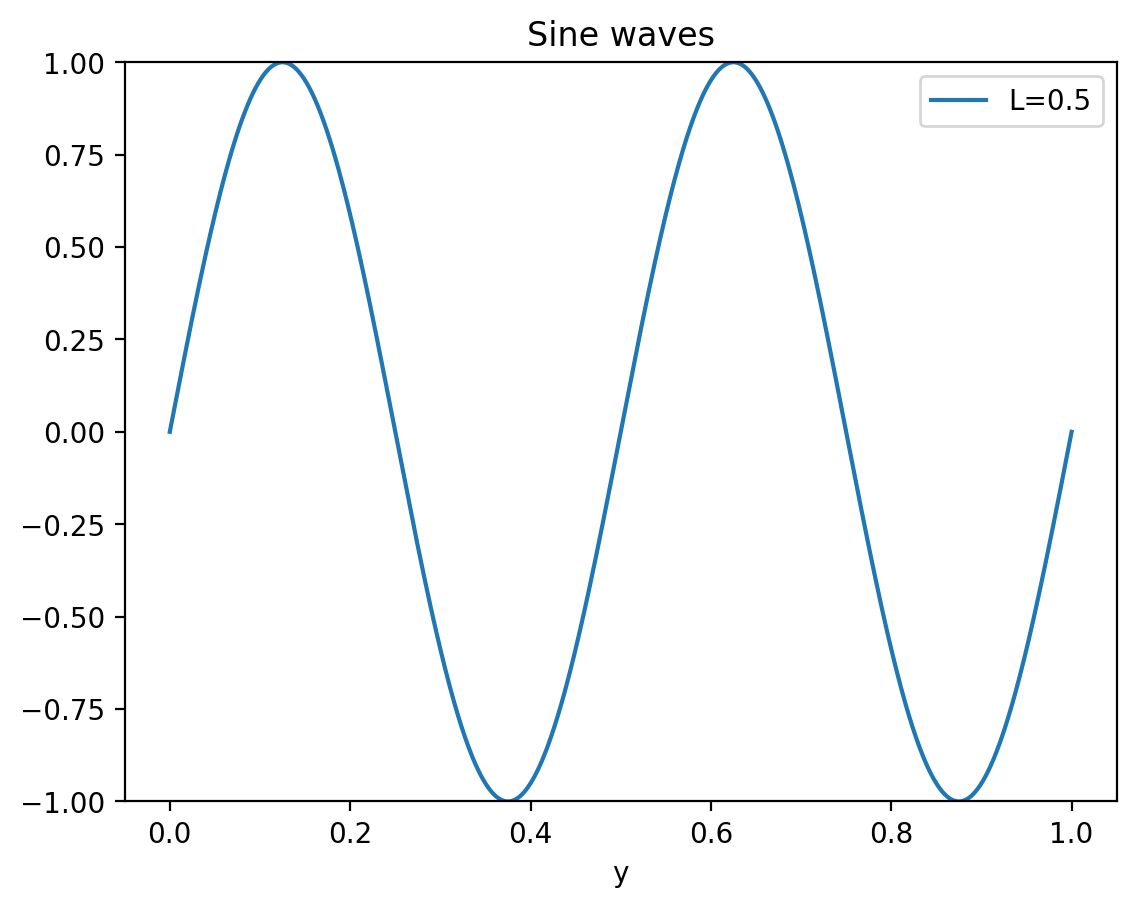

In [33]:
# Change wavelength
wave1d(L=0.5)

### Interact with waves

- By adding ``@widgets.interact(parameters=(init,final))`` to our functions we can interactively parameters in the function using slider widgets.

In [34]:
interactive(wave1d, L=(0.1, 2))

interactive(children=(FloatSlider(value=2.0, description='L', max=2.0, min=0.1), Output()), _dom_classes=('wid…

## Traveling, standing waves and wave interference 

In [35]:
def wavef2(k=10, t=0, phi=0, v=1):

    x     = np.linspace(0, 1., 1000)
    
    wave1 = np.sin(k*(x-v*t)) 
    wave2 = np.sin(k*(x-v*t)+phi)    #try flipping the direction of velocity to get standing wave
    
    plt.plot(x, wave1,   lw=2, color='blue')
    plt.plot(x, wave2,   lw=2,  color='green')
    plt.plot(x, wave1+wave2, lw=3,  color='red')
    
    plt.ylim([-2.5, 2.5])
    plt.legend(['Wave1','Wave2','Wave1+Wave2'])
    plt.grid('on')
    plt.show()

In [36]:
interactive(wavef2, k=(2, 20), t=(0,50.0,0.1), phi=(0, 2*np.pi, np.pi/8),v=1)

interactive(children=(IntSlider(value=10, description='k', max=20, min=2), FloatSlider(value=0.0, description=…

### Traveling wave as a function of time and position

In [73]:
import plotly.express as px

def wave_x_t(A = 1, k = 1.0, omega = 1, phi = 0):
    
    # Create a grid of x and t values
    x = np.linspace(0, 2 * np.pi, 50)
    t = np.linspace(0, 2 * np.pi, 50)
    X, T = np.meshgrid(x, t)

    # Calculate the wave amplitude for each combination of x and t
    Y = A * np.sin(k * X - omega * T + phi)

    return px.scatter_3d(x=X.ravel(), 
              y=T.ravel(), 
              z=Y.ravel(), 
              color = Y.ravel(),
              labels={'x': 'Position', 'y': 'Time', 'z': 'Amplitude'},
              width=1000, 
              height=1000)

In [78]:
wave_x_t(A=1, k = 1.0, omega=2, phi=0)

## Normal modes of 1D guitar string

In [24]:
def guitar1d(n=1, t=0):
    
    v=1
    L=1
    omega= np.pi*v/L
    x = np.linspace(0, +1., 1000)
    
    y = np.sin(n*np.pi * x/L) * np.cos(omega*t)
    
    plt.plot(x, y, lw=3)
    plt.title(label=f'Normal mode # {n}')
    plt.grid('--')
    plt.ylim(-1,1)
    plt.show()

In [25]:
interactive(guitar1d, n=(1,10), t=(0, 10, 0.1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), FloatSlider(value=0.0, description='…

## 1D guitar vibrations as linear combination of normal modes

For simplicity we will combine two modes with two different mode numbers and shifted with resepct to each ophter by a phase $\phi$.  

$$Mode_1 = cos(\omega t) \cdot sin(n_1\pi  \cdot \frac{x}{L})$$

$$Mode_2 = cos(\omega t+\phi) \cdot sin(n_2\pi  \cdot \frac{x}{L})$$

In [9]:
def wavef(n1=1, n2=1, phi=0,t=0):
    
    L=1
    omega=1
     
    x = np.linspace(0, +1., 50)
    
    mode1 = np.cos(omega*t) * np.sin(n1*np.pi * x/L)
    
    mode2 = np.cos(omega*t + phi) * np.sin(n2*np.pi * x/L)
    
    plt.plot(x, mode1+mode2, lw=5, color='orange')
    plt.ylim([-2.5, 2.5])
    plt.grid('on')
    plt.show()

In [10]:
interactive(wavef, n1=(1,5), n2=(1,5), phi=(0,2*np.pi), t=(0,100,0.1) )

interactive(children=(IntSlider(value=1, description='n1', max=5, min=1), IntSlider(value=1, description='n2',…

## Normal modes of a 2D membrane

In [2]:
def membrane2d(n=1, m=1, t=0): 
    '''Normal modes of 2D membrane on a square geometry'''
    
    # Constants
    Lx, Ly = 1.0, 1.0  # Dimensions of the rectangular region
    v = 1 # wave speed 
    omega  = v * np.pi/Lx *  (n**2+m**2)     # Angular rate
    
    # Create a spatial grid
    Nx, Ny = 100, 100
    x, y  = np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny)
    X, Y  = np.meshgrid(x, y)

    # Compute spatial part of the normal mode
    u = np.sin(m * np.pi * X / Lx) * np.sin(n * np.pi * Y / Ly) * np.cos(omega*t)
   
    ### Plot in 3D
    fig = plt.figure(figsize=(9, 4))
    ax1  = fig.add_subplot(1, 2, 1)
    ax1.contourf(X, Y, u, 40, cmap='RdBu')
    
    ax2  = fig.add_subplot(1, 2, 2, projection='3d')
    surf=ax2.plot_surface(X, Y, u, cmap='RdBu')
    ax2.set_zlim(-1, 1)
    
    plt.show()

In [3]:
interactive(membrane2d, n=(1,10), m=(1,10), t=(0,100))

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), IntSlider(value=1, description='m', …

In [14]:
def membrane2d_plotly(n=1, m=1, t=0): 
    '''Normal modes of 2D membrane on a square geometry using Plotly plot'''
    
    # Constants
    Lx, Ly = 1.0, 1.0  # Dimensions of the rectangular region
    v = 1 # wave speed 
    omega  = v * np.pi/Lx *  (n**2+m**2)     # Angular rate
    
    # Create a spatial grid
    Nx, Ny = 100, 100
    x, y  = np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny)
    X, Y  = np.meshgrid(x, y)

    # Compute spatial part of the normal mode
    u = np.sin(m * np.pi * X / Lx) * np.sin(n * np.pi * Y / Ly) * np.cos(omega*t)
   
    # Creating the 3D surface plot
    surface_plot = go.Surface(z=u, x=X, y=Y)

    # Add plot to figure and specify labels
    fig = go.Figure(data=[surface_plot])

    fig.update_layout(title='Membrane modes',
                  scene=dict(
                      xaxis_title='X Axis',
                      yaxis_title='Y Axis',
                      zaxis_title='Z Axis'
                     
                  ),  width=700, 
                      height=700)

    fig.show()

In [16]:
interact(membrane2d_plotly, n=(1,10), m=(1,10), t=(0,100))

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), IntSlider(value=1, description='m', …

<function __main__.membrane2d_plotly(n=1, m=1, t=0)>